In [33]:
# Importação de Bibliotecas
import numpy as np
import math
import pandas as pd
import scipy.spatial
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import train_test_split

In [34]:
class KNN:
    def __init__(self, k, h):
        self.h = h
        self.k = k

    def train(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, x_test):
        y = []
        if x_test.ndim == 1:
            num_linhas = 1
        else:
            num_linhas = x_test.shape[0]
        for i in range (num_linhas):
            d = []
            resp = []
            for j in range(len(self.x_train)):
                distance = np.sqrt(np.sum((x_test - self.x_train[j]) ** 2))
                if distance < self.h:
                    d.append([distance, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                resp.append(self.y_train[j])
            if len(resp) > 0:
                y_aux = Counter(resp).most_common(1)[0][0]
            else:
                y_aux = 'nan'
            y.append(y_aux)
        return y
            

# 1. Iris

In [39]:
# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
x = iris['data']
y = iris['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

In [40]:
asw = pd.DataFrame()
df = pd.DataFrame()
ks = [2, 5, 10, 15]
hs = np.arange(0.2, 4, 0.2)
k_array = []
h_array = []
acc_array = []
out_array = []
wrong_array = []

for k in ks:
    for h in hs:
        knn = KNN(k, h)
        knn.train(x_train, y_train)
        count = 0
        count2 = 0
        for i in range(len(x_test)):
            resp = knn.predict(x_test[i])
            if isinstance(resp[0], np.int32):
                if resp[0] == y_test[i]:
                    count = count + 1
                else:
                    count2 = count2 + 1
        out = round(count2 / len(x_test) * 100, 2)
        acc = round(count / len(x_test) * 100, 2)
        wrong = 100 - acc - out
        k_array.append(k)
        h_array.append(h)
        acc_array.append(acc)
        out_array.append(out)
        wrong_array.append(wrong)

dados = {
    "k": k_array,
    "h": h_array,
    "acc": acc_array,
    "out": out_array,
    "wrong": wrong_array
}

asw = pd.DataFrame(dados)

In [41]:
asw

,k,h,acc,out,wrong
0,2,0.2,2.96,0.00,97.04
1,2,0.4,27.41,1.48,71.11
2,2,0.6,66.67,1.48,31.85
3,2,0.8,84.44,2.22,13.34
4,2,1.0,88.89,2.22,8.89
...,...,...,...,...,...
71,15,3.0,61.48,38.52,0.00
72,15,3.2,45.19,54.81,0.00
73,15,3.4,36.30,63.70,0.00
74,15,3.6,36.30,63.70,0.00


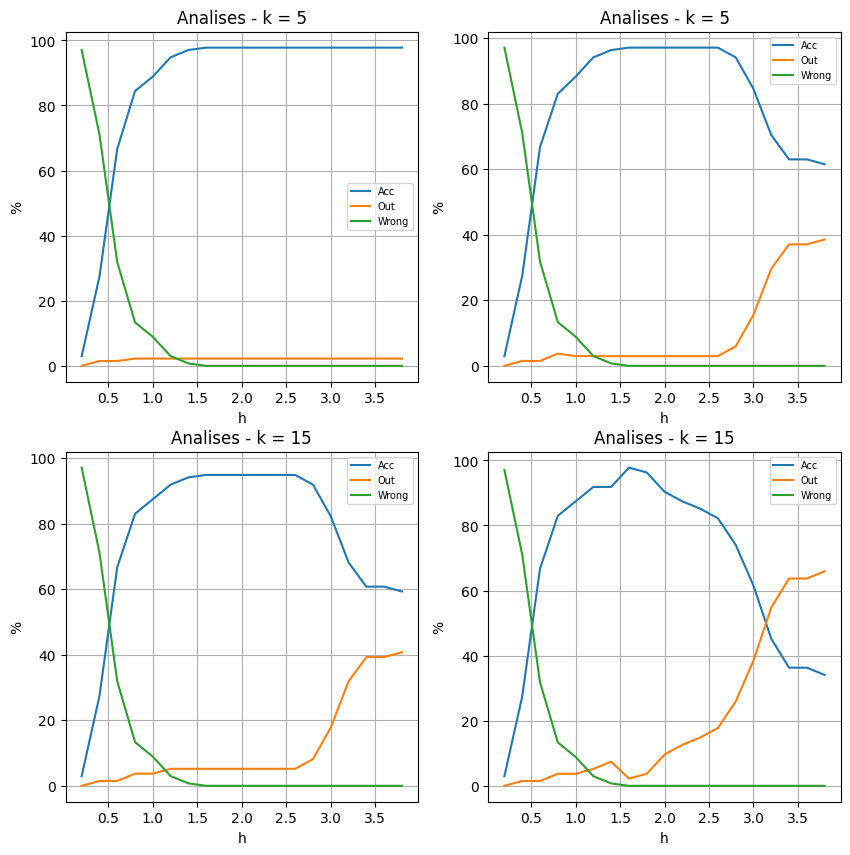

In [42]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(2):
    for j in range(2):
        df = asw[asw['k'] == ks[2*i + j]]

        axs[i, j].plot(df['h'], df['acc'], label = 'Acc')
        axs[i, j].plot(df['h'], df['out'], label = 'Out')
        axs[i, j].plot(df['h'], df['wrong'], label = 'Wrong')

        # Adicionar rotulos, titulo e legenda
        axs[i, j].set_xlabel('h')
        axs[i, j].set_ylabel('%')
        axs[i, j].set_title(f'Analises - k = {ks[2*i+1]}')
        axs[i, j].legend(fontsize = 7)
        axs[i, j].grid()

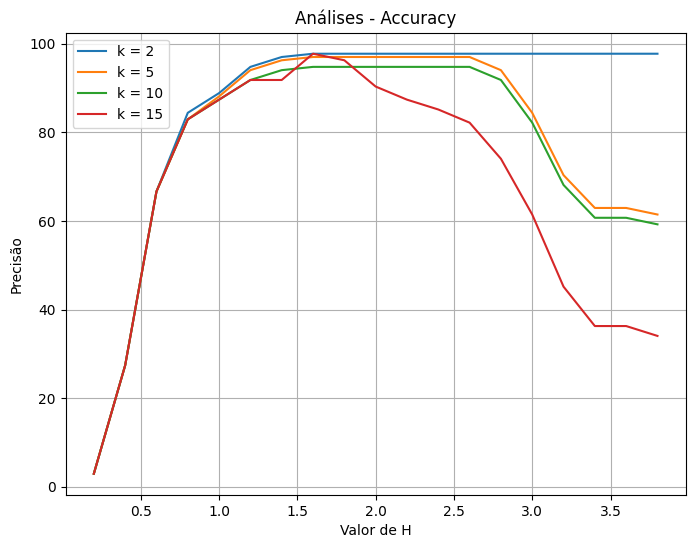

In [29]:
df0 = asw[asw['k'] == ks[0]]
df1 = asw[asw['k'] == ks[1]]
df2 = asw[asw['k'] == ks[2]]
df3 = asw[asw['k'] == ks[3]]

# Plotando as duas retas
plt.figure(figsize = (8, 6))
plt.plot(df0['h'], df0['acc'], label = 'k = 2')
plt.plot(df1['h'], df1['acc'], label = 'k = 5')
plt.plot(df2['h'], df2['acc'], label = 'k = 10')
plt.plot(df3['h'], df3['acc'], label = 'k = 15')

# Adicionando titulos e legenda ao grafico
plt.xlabel('Valor de H')
plt.ylabel('Precisão')
plt.title('Análises - Accuracy')
plt.legend()

# Exibição do Gráfico
plt.grid(True)
plt.show()

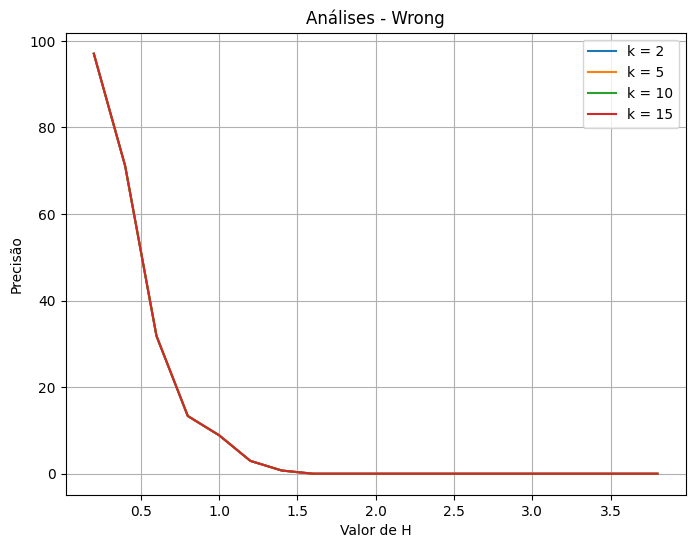

In [31]:
# Plotando as duas retas
plt.figure(figsize = (8, 6))
plt.plot(df0['h'], df0['wrong'], label = 'k = 2')
plt.plot(df1['h'], df1['wrong'], label = 'k = 5')
plt.plot(df2['h'], df2['wrong'], label = 'k = 10')
plt.plot(df3['h'], df3['wrong'], label = 'k = 15')

# Adicionando titulos e legenda ao grafico
plt.xlabel('Valor de H')
plt.ylabel('Precisão')
plt.title('Análises - Wrong')
plt.legend()

# Exibição do Gráfico
plt.grid(True)
plt.show()

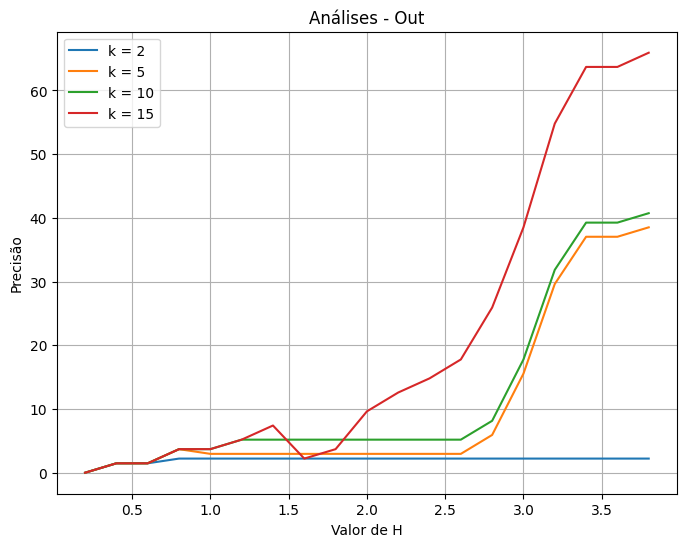

In [30]:
# Plotando as duas retas
plt.figure(figsize = (8, 6))
plt.plot(df0['h'], df0['out'], label = 'k = 2')
plt.plot(df1['h'], df1['out'], label = 'k = 5')
plt.plot(df2['h'], df2['out'], label = 'k = 10')
plt.plot(df3['h'], df3['out'], label = 'k = 15')

# Adicionando titulos e legenda ao grafico
plt.xlabel('Valor de H')
plt.ylabel('Precisão')
plt.title('Análises - Out')
plt.legend()

# Exibição do Gráfico
plt.grid(True)
plt.show()